In [0]:
#%pip install tensorflow
#%pip install langdetect

In [0]:
import pandas as pd
from pyspark.sql import Row, Column
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.stat import Correlation
import tensorflow as tf 
import numpy as np
from datetime import datetime, timedelta


file_location_nvda = "dbfs:/FileStore/tables/dailyNVDA.csv"
file_location_msft = "dbfs:/FileStore/tables/dailyMSFT.csv"
file_location_ibm = "dbfs:/FileStore/tables/dailyIBM.csv"

file_location_msft_earnings = "dbfs:/FileStore/tables/earningsMSFT.csv"
file_location_msft_monthly = "dbfs:/FileStore/tables/monthlyMSFT.csv"


schema_stocks = StructType(
    [
        StructField("open", FloatType(), True),
        StructField("high", FloatType(), True),
        StructField("low", FloatType(), True),
        StructField("close", FloatType(), True),
        StructField("volume", LongType(), True),
        StructField("date", DateType(), True),
    ]
)

schema_earnings = StructType(
    [
        StructField("date", DateType(), True),
        StructField("eps", FloatType(), True),
    ]
)

df_nvda = spark.read.csv(file_location_nvda, encoding="UTF-8", header=True, schema=schema_stocks)
df_msft = spark.read.csv(file_location_msft, encoding="UTF-8", header=True, schema=schema_stocks)
df_ibm = spark.read.csv(file_location_ibm, encoding="UTF-8", header=True, schema=schema_stocks)

df_msft_earnings = spark.read.csv(file_location_msft_earnings, encoding="UTF-8", header=True, schema=schema_earnings)
df_msft_monthly = spark.read.csv(file_location_msft_monthly, encoding="UTF-8", header=True, schema=schema_stocks)


display(df_nvda.sort(col('date'), ascending=False))
display(df_msft.sort(col('date'), ascending=False))
display(df_ibm.sort(col('date'), ascending=False))

# display(df_msft_earnings.sort(col('date'), ascending=False))
# display(df_msft_monthly.sort(col('date'), ascending=False))

open high low close volume date 484.62 495.47 483.0601 490.97 41080455 2024-01-05 477.67 485.0 475.08 479.98 30653489 2024-01-04 474.85 481.841 473.2 475.69 32089617 2024-01-03 492.44 492.95 475.95 481.68 41125422 2024-01-02 498.13 499.97 487.51 495.22 38929330 2023-12-29 496.43 498.8399 494.12 495.22 24658748 2023-12-28 495.11 496.8 490.85 494.17 23215431 2023-12-27 489.68 496.0 489.6 492.79 24419952 2023-12-26 491.95 493.83 484.67 488.3 25250676 2023-12-22 488.11 490.95 484.19 489.9 30042535 2023-12-21 496.55 499.99 480.98 481.11 39789439 2023-12-20 494.24 497.0 488.95 496.04 46313248 2023-12-19 494.0 504.3299 491.5 500.77 41258717 2023-12-18 481.94 494.04 481.2 488.9 47994758 2023-12-15 483.9 486.7 474.22 483.5 39123174 2023-12-14 476.29 485.94 476.08 480.88 44779186 2023-12-13 460.46 476.66 460.46 476.57 37238686 2023-12-12 474.91 475.31 458.3 466.27 50972809 2023-12-11 465.95 477.4085 465.5 475.06 35922370 2023-12-08 457.0 466.29 456.04 465.96 35082255 2023-12-07 472.145 473.87 454.12 455.03 36778599 2023-12-06 454.66 466.0 452.71 465.66 37171762 2023-12-05 460.77 460.77 450.1 455.1 43754344 2023-12-04 465.25 472.0 461.87 467.65 36931701 2023-12-01 480.24 481.1 464.22 467.7 52624663 2023-11-30 483.79 487.62 478.6 481.4 38200465 2023-11-29 482.36 483.229 474.73 478.21 40149085 2023-11-28 478.0 485.3 476.52 482.42 39566190 2023-11-27 484.7001 489.21 477.45 477.76 29464464 2023-11-24 498.52 503.3494 476.9 487.16 90064233 2023-11-22 501.26 505.17 492.22 499.44 56574687 2023-11-21 493.12 505.48 491.8101 504.09 41614260 2023-11-20 495.24 497.17 490.07 492.98 32589691 2023-11-17 486.79 495.2469 483.3 494.8 33975624 2023-11-16 499.35 499.6 482.0 488.88 47549735 2023-11-15 496.8 498.34 490.4001 496.56 41695387 2023-11-14 483.2 491.16 480.9901 486.2 38413570 2023-11-13 475.0 484.72 472.8301 483.35 42244156 2023-11-10 474.67 482.3 467.5 469.5 54049597 2023-11-09 461.0 468.67 459.68 465.74 34671894 2023-11-08 457.19 462.18 451.575 459.55 34316547 2023-11-07 452.845 459.35 448.99 457.51 40073335 2023-11-06 440.2 453.0899 437.23 450.05 42460959 2023-11-03 433.28 438.84 428.94 435.06 40917187 2023-11-02 408.84 423.81 408.69 423.25 43759290 2023-11-01 404.5 408.79 392.3001 407.8 51796870 2023-10-31 410.87 417.66 404.81 411.61 38802814 2023-10-30 411.3 412.06 400.15 405.0 41678441 2023-10-27 418.53 422.5555 398.8019 403.26 54100132 2023-10-26 433.98 436.5 415.55 417.79 39837922 2023-10-25 430.77 436.97 426.91 436.63 40146337 2023-10-24 412.29 432.4799 409.45 429.75 47853049 2023-10-23 418.9 424.7 410.78 413.87 47726605 2023-10-20 428.11 432.97 418.82 421.01 50123308 2023-10-19 425.91 432.19 418.25 421.96 62729434 2023-10-18 440.0 447.54 424.8 439.38 81233267 2023-10-17 450.63 462.25 449.12 460.95 37509924 2023-10-16 469.6 471.16 452.8 454.61 47542599 2023-10-13 467.77 476.09 463.3 469.45 48132500 2023-10-12 461.96 468.59 460.5 468.06 37813689 2023-10-11 453.1 462.59 450.88 457.98 36858208 2023-10-10 448.42 456.05 443.68 452.73 40967472 2023-10-09 441.93 457.89 440.26 457.62 43443602 2023-10-06 440.5 449.0 438.88 446.88 39348309 2023-10-05 437.42 441.43 432.9201 440.41 36182086 2023-10-04 448.08 451.3 432.46 435.17 47084954 2023-10-03 440.3 451.75 438.61 447.82 43329821 2023-10-02 438.27 441.44 433.0694 434.99 39782993 2023-09-29 424.6 434.4631 421.15 430.89 42466279 2023-09-28 423.3 428.72 416.2901 424.68 44493520 2023-09-27 420.01 428.2 416.55 419.11 40228209 2023-09-26 415.91 425.36 411.77 422.22 41909096 2023-09-25 415.72 421.15 412.31 416.1 47923631 2023-09-22 415.83 421.0 409.8 410.17 45073596 2023-09-21 436.0 439.03 422.23 422.39 36710769 2023-09-20 438.33 439.66 430.02 435.2 37306424 2023-09-19 427.48 442.42 420.0 439.66 50027079 2023-09-18 453.41 455.99 438.08 439.0 50683051 2023-09-15 459.5 459.8699 451.31 455.81 37009720 2023-09-14 446.0 459.3 445.03 454.85 39835535 2023-09-13 447.38 456.73 445.31 448.7 34925634 2023-09-12 461.48 461.63 443.12 451.78 47396555 2023-09-11 459.42 466.06 452.71 455.72 47389994 2023-09-08 455.25 463.

open high low close volume date 368.97 372.06 366.5 367.75 20074451 2024-01-05 370.665 373.1 367.17 367.94 20901502 2024-01-04 369.01 373.2562 368.51 370.6 23083465 2024-01-03 373.86 375.9 366.771 370.87 25258633 2024-01-02 376.0 377.16 373.48 376.04 18730838 2023-12-29 375.37 376.458 374.16 375.28 14327013 2023-12-28 373.69 375.06 372.8116 374.07 14872756 2023-12-27 375.0 376.94 373.5 374.66 12673050 2023-12-26 373.68 375.18 372.71 374.58 17107484 2023-12-22 372.56 374.41 370.04 373.54 17708006 2023-12-21 375.0 376.03 370.53 370.62 26316650 2023-12-20 371.49 373.26 369.84 373.26 20533284 2023-12-19 369.45 373.0 368.68 372.65 21802878 2023-12-18 366.85 372.4 366.28 370.73 78502324 2023-12-15 373.31 373.76 364.13 365.93 43277461 2023-12-14 376.02 377.6361 370.77 374.37 30955531 2023-12-13 370.85 374.42 370.46 374.38 24838253 2023-12-12 368.48 371.6 366.1 371.3 27708757 2023-12-11 369.2 374.46 368.23 374.23 20154366 2023-12-08 368.23 371.4527 366.32 370.95 23118864 2023-12-07 373.54 374.18 368.03 368.8 21118348 2023-12-06 366.45 373.075 365.621 372.52 23065035 2023-12-05 369.1 369.52 362.9 369.14 32063305 2023-12-04 376.76 378.16 371.31 374.51 33040472 2023-12-01 378.49 380.09 375.47 378.91 30554415 2023-11-30 383.76 384.3 377.44 378.85 28963399 2023-11-29 378.35 383.0 378.16 382.7 20453112 2023-11-28 376.78 380.64 376.2 378.61 22179228 2023-11-27 377.33 377.97 375.135 377.43 10176649 2023-11-24 378.0 379.7899 374.965 377.85 23361184 2023-11-22 375.67 376.2215 371.12 373.07 28423145 2023-11-21 371.22 378.87 371.0 377.44 52528964 2023-11-20 373.61 374.37 367.0 369.85 40325371 2023-11-17 370.96 376.35 370.18 376.17 27182315 2023-11-16 371.28 373.13 367.11 369.67 26860095 2023-11-15 371.01 371.95 367.3454 370.27 27683862 2023-11-14 368.22 368.47 365.9 366.68 19986506 2023-11-13 361.49 370.1 361.07 369.67 28065164 2023-11-10 362.3 364.79 360.362 360.69 24847331 2023-11-09 361.68 363.87 360.55 363.2 26767828 2023-11-08 359.4 362.46 357.63 360.53 25833931 2023-11-07 353.45 357.54 353.35 356.53 23828301 2023-11-06 349.63 354.39 347.33 352.8 23637673 2023-11-03 347.24 348.83 344.77 348.32 24348072 2023-11-02 339.79 347.42 339.65 346.07 28158819 2023-11-01 338.85 339.0 334.69 338.11 20265282 2023-10-31 333.41 339.45 331.83 337.31 22828082 2023-10-30 330.425 336.72 328.4007 329.81 29856522 2023-10-27 340.54 341.63 326.94 327.89 37828543 2023-10-26 345.02 346.2 337.62 340.67 55053828 2023-10-25 331.3 331.84 327.6 330.53 31153571 2023-10-24 325.47 332.725 324.39 329.32 24374748 2023-10-23 331.72 331.92 325.45 326.67 25027715 2023-10-20 332.15 336.88 330.91 331.32 25052071 2023-10-19 332.49 335.59 328.3 330.11 23153602 2023-10-18 329.59 333.46 327.41 332.06 18338523 2023-10-17 331.05 336.14 330.6 332.64 22158048 2023-10-16 332.38 333.83 326.36 327.73 21085695 2023-10-13 330.565 333.6299 328.72 331.16 19313098 2023-10-12 331.21 332.82 329.14 332.42 20063246 2023-10-11 330.96 331.1 327.67 328.39 20557094 2023-10-10 324.75 330.3 323.18 329.82 19891180 2023-10-09 316.55 329.19 316.3 327.26 25673630 2023-10-06 319.09 319.98 314.9 319.36 16965629 2023-10-05 314.03 320.04 314.0 318.955 20720144 2023-10-04 320.83 321.39 311.215 313.39 21033492 2023-10-03 316.28 321.888 315.18 321.8 20570006 2023-10-02 317.75 319.47 314.98 315.75 24147298 2023-09-29 310.99 315.48 309.45 313.64 19683564 2023-09-28 312.3 314.299 309.69 312.79 19410082 2023-09-27 315.13 315.88 310.02 312.14 26297573 2023-09-26 316.59 317.67 315.0 317.54 17835964 2023-09-25 321.32 321.45 316.15 317.01 21447887 2023-09-22 319.26 325.3499 315.0 319.53 35560362 2023-09-21 329.51 329.59 320.51 320.77 21436525 2023-09-20 326.17 329.39 324.51 328.65 16514487 2023-09-19 327.8 330.4 326.36 329.06 16834208 2023-09-18 336.92 337.3975 329.65 330.22 37679792 2023-09-15 339.148 340.86 336.57 338.7 20267048 2023-09-14 331.31 336.85 331.17 336.06 16544412 2023-09-13 335.815 336.79 331.48 331.77 17565482 2023-09-12 337.24 338.42 335.43 337.94 16583324 2023-09-11 330.09 336.16 329.46 334.27 19548165 2023

open high low close volume date 159.91 160.55 158.67 159.16 3698961 2024-01-05 160.22 161.81 160.17 160.86 3212004 2024-01-04 161.0 161.73 160.08 160.1 4086065 2024-01-03 162.83 163.29 160.46 161.5 3825044 2024-01-02 163.75 164.18 162.83 163.55 2526169 2023-12-29 163.96 163.96 163.4 163.75 2071313 2023-12-28 163.14 163.64 162.68 163.46 3006612 2023-12-27 162.23 163.31 162.05 163.21 1772443 2023-12-26 161.1 162.41 161.0 162.14 2442715 2023-12-22 160.59 161.08 159.53 160.78 2982924 2023-12-21 161.29 161.8 160.01 160.05 4865797 2023-12-20 161.8 162.28 161.32 161.56 3717429 2023-12-19 162.23 163.33 161.5766 162.74 3677533 2023-12-18 162.3 164.09 162.04 162.23 11016108 2023-12-15 162.93 163.499 160.149 162.91 6129804 2023-12-14 164.37 164.9653 162.735 163.62 4989141 2023-12-13 163.27 166.34 162.92 164.71 5292290 2023-12-12 162.68 163.65 161.95 163.51 6077207 2023-12-11 160.0 162.04 160.0 161.96 4561342 2023-12-08 161.0 161.465 159.97 160.22 3665498 2023-12-07 161.59 162.355 160.01 160.28 3356432 2023-12-06 160.76 162.47 160.72 161.39 4556668 2023-12-05 160.29 162.79 160.29 161.1 5779017 2023-12-04 158.41 160.59 158.0 160.55 4871860 2023-12-01 156.95 158.6 156.89 158.56 6740622 2023-11-30 156.15 157.51 156.02 156.41 3568887 2023-11-29 155.44 155.745 154.86 155.65 2666182 2023-11-28 154.99 156.135 154.75 155.57 4053093 2023-11-27 155.13 155.4 153.92 155.18 1799161 2023-11-24 154.5 155.705 154.16 155.13 3045091 2023-11-22 154.6 154.66 153.51 153.91 2859508 2023-11-21 152.51 154.68 152.35 154.35 3658936 2023-11-20 153.29 153.5 152.4601 152.89 4426676 2023-11-17 153.0 153.35 152.13 153.06 3519172 2023-11-16 150.4 153.22 150.4 152.58 4632519 2023-11-15 149.45 150.8063 149.05 150.41 4321940 2023-11-14 148.46 148.49 147.35 148.1 2647288 2023-11-13 147.44 149.17 146.85 149.02 3179541 2023-11-10 146.55 146.99 145.28 146.62 3412713 2023-11-09 149.25 149.68 147.585 148.03 3618588 2023-11-08 149.03 149.28 148.03 148.83 3549853 2023-11-07 147.89 149.225 147.85 148.97 4597249 2023-11-06 147.45 148.445 147.28 147.9 3510495 2023-11-03 145.77 147.1 144.84 147.01 3902657 2023-11-02 145.0 146.51 144.45 145.4 4750081 2023-11-01 143.0 144.76 142.59 144.64 6592041 2023-10-31 143.19 144.5 142.58 142.63 4204190 2023-10-30 143.62 144.7 141.71 142.52 5469227 2023-10-27 142.2 144.41 141.58 143.76 11130170 2023-10-26 137.5 138.49 136.33 137.08 6472549 2023-10-25 136.74 137.98 136.05 137.79 3697975 2023-10-24 136.63 137.68 135.87 136.38 3457527 2023-10-23 138.15 139.27 137.12 137.16 4865615 2023-10-20 138.64 139.405 137.93 138.01 5314159 2023-10-19 140.0 140.43 139.58 139.97 3329985 2023-10-18 137.12 140.62 136.31 140.32 4172822 2023-10-17 139.28 139.78 138.52 139.21 3361468 2023-10-16 139.77 140.12 138.27 138.46 4583553 2023-10-13 142.51 142.93 140.95 141.24 3921142 2023-10-12 142.51 143.34 142.14 143.23 2511459 2023-10-11 142.6 143.415 141.72 142.11 3015784 2023-10-10 142.3 142.4 140.68 142.2 2354396 2023-10-09 141.4 142.94 140.11 142.03 3511347 2023-10-06 140.9 141.7 140.19 141.52 3223910 2023-10-05 140.37 141.2004 139.99 141.07 2637779 2023-10-04 140.87 141.64 140.0 140.39 3284421 2023-10-03 140.04 141.45 139.86 140.8 3275461 2023-10-02 142.0 142.13 139.61 140.3 5703983 2023-09-29 142.14 142.282 140.205 141.58 5783422 2023-09-28 143.67 143.82 141.76 143.17 4439121 2023-09-27 145.51 146.17 143.0201 143.24 4824654 2023-09-26 146.57 147.43 146.25 146.48 2694245 2023-09-25 147.41 148.1 146.82 146.91 2562216 2023-09-22 149.0 149.25 147.31 147.38 4944786 2023-09-21 148.36 151.9299 148.13 149.83 9636681 2023-09-20 145.0 146.72 144.66 146.52 3945423 2023-09-19 145.77 146.48 145.06 145.09 2508062 2023-09-18 147.11 147.85 145.53 145.99 6234033 2023-09-15 147.38 147.73 146.48 147.35 2723200 2023-09-14 145.95 146.98 145.92 146.55 2627999 2023-09-13 147.92 148.0 145.8 146.3 4457695 2023-09-12 148.57 148.78 147.58 148.38 3273720 2023-09-11 147.35 148.59 147.26 147.68 3722927 2023-09-08 148.13 148.78 147.4 147.52 3333040 2023-09-07 147.66 148.33 147.12 148.06 2932203 2023

# Pearson's correlation test

The Product Moment Correlation Coefficiont (PMCC), or r, is a measure of how strongly related 2 variables are. <br>
Sample size 2,305, significant level 0.05 <br>
The hypothesis is one-tailed (right) since we are only testing for positive correlation. <br>
The corresponding critical correlation value r_c for a signifiance level of α=0.05, for a right-tailed test is: r_c = 0.024. <br>
Observe that in this case, the null hypothesis is rejected if |r| > r_c = 0.024.


## 1
### 1 a
Null Hypothesis: There is no correlation between the price of nvidia and price of microsoft stocks on a daily basis. <br>
Alternate Hypothesis: There exists a correlation, either positive or negative, between the price of nvidia and price of microsoft stocks on a daily basis. <br>
Output: Confusion matrix with calculated PMCCs (r). <br>
The absolute value is 0.828 which is larger than 0.024. Since the PMCCs are larger than the critical value at the 5% level of significance, we can reach a conclustion. <br>
Conclusion: SInce the PMCCs are larger than the critical value, we choose to reject the null hypothesis. We can conclude that there is a significant evidence to support the claim that nvidia stock prices are in correlation with the microsoft stock prices.

date nvidia microsoft 1999-11-01 23.5 92.37 1999-11-02 25.0 92.56 1999-11-03 27.44 92.0 1999-11-04 29.19 91.75 1999-11-05 28.25 91.56 1999-11-08 29.06 89.94 1999-11-09 28.63 88.87 1999-11-10 28.38 87.12 1999-11-11 30.38 89.62 1999-11-12 32.0 89.19 1999-11-15 31.38 87.0 1999-11-16 34.38 87.31 1999-11-17 35.69 85.0 1999-11-18 35.81 84.94 1999-11-19 42.88 86.0 1999-11-22 42.81 89.81 1999-11-23 39.75 89.62 1999-11-24 38.5 91.69 1999-11-26 38.25 91.12 1999-11-29 36.88 90.19 1999-11-30 34.63 91.05 1999-12-01 36.38 93.19 1999-12-02 39.06 94.81 1999-12-03 38.13 96.12 1999-12-06 39.19 95.44 1999-12-07 37.88 93.0 1999-12-08 39.56 91.75 1999-12-09 38.38 92.75 1999-12-10 37.94 93.87 1999-12-13 37.81 96.62 1999-12-14 37.19 98.69 1999-12-15 36.0 108.44 1999-12-16 35.75 113.69 1999-12-17 37.63 115.25 1999-12-20 40.75 112.75 1999-12-21 42.5 115.87 1999-12-22 43.5 117.56 1999-12-23 46.38 117.44 1999-12-27 44.63 119.12 1999-12-28 44.5 117.5 1999-12-29 46.0 117.94 1999-12-30 46.38 117.62 1999-12-31 46.94 116.75 2000-01-03 46.81 116.56 2000-01-04 45.56 112.62 2000-01-05 44.19 113.81 2000-01-06 41.19 110.0 2000-01-07 41.88 111.44 2000-01-10 43.25 112.25 2000-01-11 41.5 109.37 2000-01-12 40.44 105.81 2000-01-13 42.13 107.81 2000-01-14 43.94 112.25 2000-01-18 45.81 115.31 2000-01-19 45.38 107.0 2000-01-20 45.25 106.0 2000-01-21 44.75 103.75 2000-01-24 42.75 101.25 2000-01-25 42.38 102.81 2000-01-26 40.63 99.37 2000-01-27 38.5 98.75 2000-01-28 37.38 98.25 2000-01-31 37.06 97.87 2000-02-01 37.94 102.94 2000-02-02 39.0 100.81 2000-02-03 39.63 103.62 2000-02-04 40.56 106.56 2000-02-07 38.06 106.62 2000-02-08 39.88 109.94 2000-02-09 40.88 104.0 2000-02-10 49.25 106.0 2000-02-11 50.0 99.94 2000-02-14 58.0 99.62 2000-02-15 55.75 98.56 2000-02-16 58.31 97.62 2000-02-17 60.38 99.62 2000-02-18 67.38 95.06 2000-02-22 65.5 93.81 2000-02-23 65.88 94.25 2000-02-24 65.25 94.75 2000-02-25 61.19 91.31 2000-02-28 60.75 91.56 2000-02-29 64.0 89.37 2000-03-01 62.13 90.81 2000-03-02 57.94 93.37 2000-03-03 58.88 96.12 2000-03-06 58.5 90.62 2000-03-07 83.31 92.87 2000-03-08 84.0 95.56 2000-03-09 100.3 100.0 2000-03-10 118.0 101.0 2000-03-13 149.3 98.0 2000-03-14 110.1 95.12 2000-03-15 105.6 95.37 2000-03-16 94.17 95.37 2000-03-17 99.88 99.37 2000-03-20 99.81 97.37 2000-03-21 94.88 102.75 2000-03-22 95.56 103.25 2000-03-23 97.25 111.87 2000-03-24 93.19 111.69 2000-03-27 87.06 104.06 2000-03-28 80.56 104.31 2000-03-29 75.25 107.19 2000-03-30 74.81 103.37 2000-03-31 84.48 106.25 2000-04-03 77.88 90.87 2000-04-04 75.0 88.56 2000-04-05 91.69 86.37 2000-04-06 95.94 86.0 2000-04-07 102.6 89.06 2000-04-10 93.5 86.06 2000-04-11 87.94 83.87 2000-04-12 78.81 79.37 2000-04-13 75.44 79.25 2000-04-14 68.8 74.12 2000-04-17 72.31 75.87 2000-04-18 85.13 80.56 2000-04-19 81.06 78.69 2000-04-20 80.63 78.94 2000-04-24 76.63 66.62 2000-04-25 85.0 69.37 2000-04-26 84.13 68.0 2000-04-27 91.0 69.81 2000-04-28 89.13 69.75 2000-05-01 92.0 73.44 2000-05-02 88.44 69.87 2000-05-03 87.0 70.56 2000-05-04 88.06 70.44 2000-05-05 92.13 71.12 2000-05-08 88.75 69.81 2000-05-09 87.5 67.81 2000-05-10 78.88 66.19 2000-05-11 82.25 67.87 2000-05-12 79.75 68.81 2000-05-15 85.25 69.37 2000-05-16 94.0 69.5 2000-05-17 110.5 67.69 2000-05-18 103.0 66.19 2000-05-19 102.1 65.06 2000-05-22 108.8 64.19 2000-05-23 107.9 63.19 2000-05-24 106.5 65.56 2000-05-25 105.0 61.5 2000-05-26 105.5 61.44 2000-05-30 109.9 63.38 2000-05-31 112.8 62.56 2000-06-01 117.3 64.56 2000-06-02 131.6 66.31 2000-06-05 134.4 66.87 2000-06-06 127.7 69.62 2000-06-07 122.0 70.5 2000-06-08 122.9 68.81 2000-06-09 126.4 68.81 2000-06-12 123.1 66.87 2000-06-13 126.9 67.87 2000-06-14 126.8 70.5 2000-06-15 130.1 72.37 2000-06-16 149.8 72.56 2000-06-19 159.1 73.69 2000-06-20 157.0 74.94 2000-06-21 172.9 80.69 2000-06-22 163.5 79.87 2000-06-23 148.1 77.69 2000-06-26 165.9 79.5 2000-06-27 71.25 78.81 2000-06-28 68.5 78.94 2000-06-29 58.63 77.19 2000-06-30 63.56 80.0 2000-07-03 61.13 80.0 2000-07-05 54.56 78.5 2000-07-06 57.88 80.94 2000-07-07 58.19 82.0 2000-

+------------------+------------------+
|            nvidia|         microsoft|
+------------------+------------------+
|               1.0|0.8283036430654293|
|0.8283036430654293|               1.0|
+------------------+------------------+



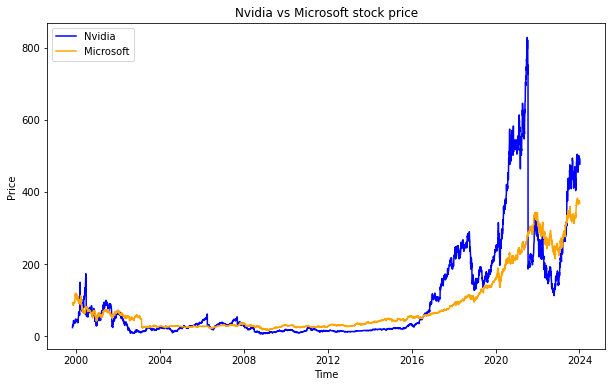

In [0]:
df_joined_1 = df_nvda.select(col('close').alias('nvidia'), col('date')).join(df_msft.select(col('close').alias('microsoft'), col('date')), 'date', 'outer').fillna(0)

display(df_joined_1)

corr_analysis_df = df_joined_1.select("nvidia", "microsoft")
vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

columns = ['nvidia', 'microsoft']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

plot_aapl_vs_msft = df_joined_1.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(plot_aapl_vs_msft['date'], plot_aapl_vs_msft['nvidia'], label='Nvidia', color='blue')
plt.plot(plot_aapl_vs_msft['date'], plot_aapl_vs_msft['microsoft'], label='Microsoft', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Nvidia vs Microsoft stock price')
plt.legend()
plt.show()

## 1
### 1 b
Null Hypothesis: There is no correlation between the price of ibm and price of microsoft stocks on a daily basis. <br>
Alternate Hypothesis: There exists a correlation, either positive or negative, between the price of ibm and price of microsoft stocks on a daily basis. <br>
Output: Confusion matrix with calculated PMCCs (r). <br>
The absolute value is 0.0823 which is larger than 0.024. Since the PMCCs are larger than the critical value at the 5% level of significance, we can reach a conclustion. <br>
Conclusion: SInce the PMCCs are larger than the critical value, we choose to reject the null hypothesis. We can conclude that there is a significant evidence to support the claim that ibm stock prices are in correlation with the microsoft stock prices.

date ibm microsoft 1999-11-01 96.75 92.37 1999-11-02 94.81 92.56 1999-11-03 94.37 92.0 1999-11-04 91.56 91.75 1999-11-05 90.25 91.56 1999-11-08 93.94 89.94 1999-11-09 93.62 88.87 1999-11-10 97.0 87.12 1999-11-11 95.0 89.62 1999-11-12 95.87 89.19 1999-11-15 94.06 87.0 1999-11-16 94.62 87.31 1999-11-17 93.75 85.0 1999-11-18 98.0 84.94 1999-11-19 103.94 86.0 1999-11-22 107.87 89.81 1999-11-23 106.06 89.62 1999-11-24 104.5 91.69 1999-11-26 105.0 91.12 1999-11-29 104.19 90.19 1999-11-30 103.06 91.05 1999-12-01 103.42 93.19 1999-12-02 105.27 94.81 1999-12-03 111.87 96.12 1999-12-06 116.0 95.44 1999-12-07 116.62 93.0 1999-12-08 118.28 91.75 1999-12-09 113.37 92.75 1999-12-10 109.0 93.87 1999-12-13 109.7 96.62 1999-12-14 109.25 98.69 1999-12-15 107.0 108.44 1999-12-16 109.19 113.69 1999-12-17 110.0 115.25 1999-12-20 109.2 112.75 1999-12-21 110.12 115.87 1999-12-22 108.0 117.56 1999-12-23 108.62 117.44 1999-12-27 109.75 119.12 1999-12-28 109.81 117.5 1999-12-29 109.0 117.94 1999-12-30 108.75 117.62 1999-12-31 107.87 116.75 2000-01-03 116.0 116.56 2000-01-04 112.06 112.62 2000-01-05 116.0 113.81 2000-01-06 114.0 110.0 2000-01-07 113.5 111.44 2000-01-10 118.0 112.25 2000-01-11 119.0 109.37 2000-01-12 119.5 105.81 2000-01-13 118.25 107.81 2000-01-14 119.62 112.25 2000-01-18 115.75 115.31 2000-01-19 119.5 107.0 2000-01-20 119.0 106.0 2000-01-21 121.5 103.75 2000-01-24 121.5 101.25 2000-01-25 119.12 102.81 2000-01-26 116.75 99.37 2000-01-27 113.5 98.75 2000-01-28 111.56 98.25 2000-01-31 112.25 97.87 2000-02-01 110.0 102.94 2000-02-02 113.5 100.81 2000-02-03 117.12 103.62 2000-02-04 115.62 106.56 2000-02-07 114.12 106.62 2000-02-08 118.81 109.94 2000-02-09 117.37 104.0 2000-02-10 119.12 106.0 2000-02-11 115.37 99.94 2000-02-14 116.06 99.62 2000-02-15 117.12 98.56 2000-02-16 115.75 97.62 2000-02-17 116.75 99.62 2000-02-18 112.5 95.06 2000-02-22 111.0 93.81 2000-02-23 108.75 94.25 2000-02-24 110.5 94.75 2000-02-25 108.0 91.31 2000-02-28 104.5 91.56 2000-02-29 102.75 89.37 2000-03-01 100.25 90.81 2000-03-02 103.12 93.37 2000-03-03 108.0 96.12 2000-03-06 103.06 90.62 2000-03-07 103.0 92.87 2000-03-08 106.25 95.56 2000-03-09 108.0 100.0 2000-03-10 105.25 101.0 2000-03-13 107.69 98.0 2000-03-14 108.62 95.12 2000-03-15 107.0 95.37 2000-03-16 109.0 95.37 2000-03-17 110.0 99.37 2000-03-20 112.75 97.37 2000-03-21 113.5 102.75 2000-03-22 114.25 103.25 2000-03-23 115.25 111.87 2000-03-24 120.62 111.69 2000-03-27 126.87 104.06 2000-03-28 122.5 104.31 2000-03-29 119.0 107.19 2000-03-30 122.75 103.37 2000-03-31 118.37 106.25 2000-04-03 122.0 90.87 2000-04-04 121.19 88.56 2000-04-05 125.0 86.37 2000-04-06 122.75 86.0 2000-04-07 123.12 89.06 2000-04-10 122.12 86.06 2000-04-11 119.37 83.87 2000-04-12 113.75 79.37 2000-04-13 110.62 79.25 2000-04-14 105.0 74.12 2000-04-17 111.87 75.87 2000-04-18 111.5 80.56 2000-04-19 105.0 78.69 2000-04-20 104.0 78.94 2000-04-24 106.5 66.62 2000-04-25 112.5 69.37 2000-04-26 110.5 68.0 2000-04-27 110.62 69.81 2000-04-28 111.5 69.75 2000-05-01 112.0 73.44 2000-05-02 111.37 69.87 2000-05-03 108.12 70.56 2000-05-04 107.62 70.44 2000-05-05 107.87 71.12 2000-05-08 109.75 69.81 2000-05-09 109.0 67.81 2000-05-10 103.0 66.19 2000-05-11 104.44 67.87 2000-05-12 104.44 68.81 2000-05-15 104.19 69.37 2000-05-16 109.0 69.5 2000-05-17 107.87 67.69 2000-05-18 106.06 66.19 2000-05-19 106.44 65.06 2000-05-22 109.25 64.19 2000-05-23 107.37 63.19 2000-05-24 109.62 65.56 2000-05-25 106.5 61.5 2000-05-26 106.94 61.44 2000-05-30 110.94 63.38 2000-05-31 107.31 62.56 2000-06-01 106.0 64.56 2000-06-02 108.81 66.31 2000-06-05 112.81 66.87 2000-06-06 112.37 69.62 2000-06-07 121.0 70.5 2000-06-08 119.75 68.81 2000-06-09 119.69 68.81 2000-06-12 118.84 66.87 2000-06-13 119.31 67.87 2000-06-14 116.0 70.5 2000-06-15 116.81 72.37 2000-06-16 113.25 72.56 2000-06-19 120.37 73.69 2000-06-20 116.37 74.94 2000-06-21 114.5 80.69 2000-06-22 111.81 79.87 2000-06-23 111.87 77.69 2000-06-26 114.41 79.5 2000-06-27 109.75 78.81 2000-06-28 113.78 78.94 2000-06-29 114.0 77.1

+-----------------+-----------------+
|              ibm|        microsoft|
+-----------------+-----------------+
|              1.0|0.083996342078327|
|0.083996342078327|              1.0|
+-----------------+-----------------+



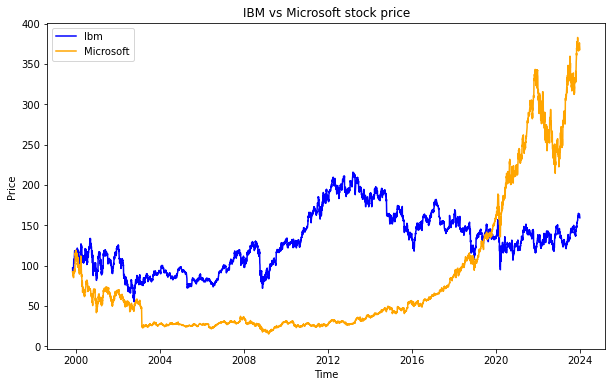

In [0]:
df_joined_2 = df_ibm.select(col('close').alias('ibm'), col('date')).join(df_msft.select(col('close').alias('microsoft'), col('date')), 'date', 'outer').fillna(0)

display(df_joined_2)

corr_analysis_df = df_joined_2.select("ibm", "microsoft")
vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

columns = ['ibm', 'microsoft']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

plot_ibm_vs_msft = df_joined_2.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(plot_ibm_vs_msft['date'], plot_ibm_vs_msft['ibm'], label='Ibm', color='blue')
plt.plot(plot_ibm_vs_msft['date'], plot_ibm_vs_msft['microsoft'], label='Microsoft', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('IBM vs Microsoft stock price')
plt.legend()
plt.show()

## 2

Null Hypothesis: There is no correlation between the price of microsoft stocks and microsoft earning on a yearly basis. <br>
Alternate Hypothesis: There exists a correlation, either positive or negative, between the price of microsoft stocks and  microsoft earning on a yearly basis. <br>
Output: Confusion matrix with calculated PMCCs (r). <br>
The absolute value is 0.909 which is larger than 0.024. Since the PMCCs are larger than the critical value at the 5% level of significance, we can reach a conclustion. <br>
Conclusion: SInce the PMCCs are larger than the critical value, we choose to reject the null hypothesis. We can conclude that there is a significant evidence to support the claim that microsoft stock prices are in correlation with the microsoft earnings.

year earnings monthly 1999 0.71 116.75 2000 0.87 43.38 2001 0.91 66.25 2002 0.93 51.7 2003 1.05 27.37 2004 1.26 26.72 2005 1.3 26.15 2006 1.27 29.86 2007 1.49 35.6 2008 1.88 19.44 2009 1.7 30.48 2010 2.1 27.91 2011 2.69 25.96 2012 2.73 26.7097 2013 2.67 37.41 2014 2.63 46.45 2015 2.5 55.48 2016 2.76 62.14 2017 3.31 85.54 2018 3.88 101.57 2019 4.75 157.7 2020 5.75 222.42 2021 7.97 336.32 2022 9.2 239.82 2023 9.81 376.04

+------------------+------------------+
|          earnings|           monthly|
+------------------+------------------+
|               1.0|0.9097850805487964|
|0.9097850805487964|               1.0|
+------------------+------------------+



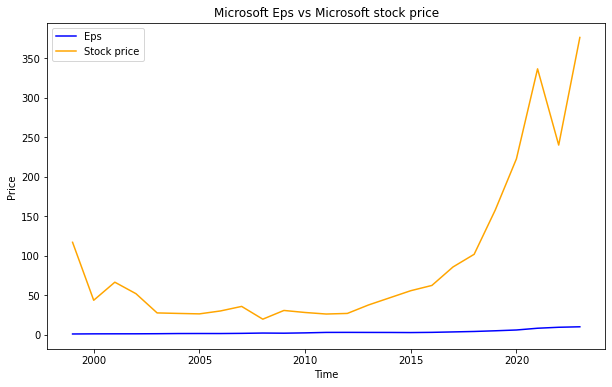

In [0]:
# Transform
df_msft_earnings = df_msft_earnings.orderBy(col('date'), ascending=False)
df_msft_earnings = df_msft_earnings.limit(26)
df_msft_earnings = df_msft_earnings.orderBy(col('date'), ascending=True)
df_msft_earnings = df_msft_earnings.limit(25).withColumn('year', year('date'))

df_msft_monthly_filtered = df_msft_monthly.withColumn('year', year('date'))
df_msft_monthly_filtered = df_msft_monthly_filtered.withColumn('month', month('date'))

# Get only last in year (December)
df_msft_monthly_filtered = df_msft_monthly_filtered.filter(df_msft_monthly_filtered['month'] == 12)

# display(df_msft_earnings.orderBy('date'))
# display(df_msft_monthly.sort(col('date'), ascending=True))


df_joined_3 = df_msft_earnings.select(col('eps').alias('earnings'), col('year')).join(df_msft_monthly_filtered.select(col('close').alias('monthly'), col('year')), 'year', 'outer').fillna(0)

display(df_joined_3)

corr_analysis_df = df_joined_3.select("earnings", "monthly")
vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

columns = ['earnings', 'monthly']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

plot_stocs_vs_earning = df_joined_3.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(plot_stocs_vs_earning['year'], plot_stocs_vs_earning['earnings'], label='Eps', color='blue')
plt.plot(plot_stocs_vs_earning['year'], plot_stocs_vs_earning['monthly'], label='Stock price', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Microsoft Eps vs Microsoft stock price')
plt.legend()
plt.show()

# 3 Stock prediction for Microsoft

We want to try to predict stock price for Microsoft in the future based on the available data.<br>
For features we will use date, because in the future it is only known. We split data into train and test set, ration 80-20. <br>


## Linear Regression

Here we are using Linear Regression for prediction. <br>
After training and testing we get that Root Mean Squared Error (RMSE) on test data is 63.1898 $. <br>
Considering maximum stock price is around 370$ error is big.

+------------+------+-------------------+
|    features| close|         prediction|
+------------+------+-------------------+
|[9.415008E8]| 92.56|-21.852316361438568|
|[9.415872E8]|  92.0| -21.82844683793661|
|[9.422784E8]| 89.62|-21.637490649921006|
|[9.427968E8]|  85.0| -21.49427350890926|
|[9.433152E8]| 89.62|-21.351056367897513|
|[9.435744E8]| 91.12| -21.27944779739164|
|[9.440064E8]| 93.19| -21.16010017988185|
|[9.441792E8]| 96.12|-21.112361132877936|
|[9.445248E8]|  93.0|-21.016883038870162|
|[9.458208E8]|117.56|-20.658840186340797|
|[9.488448E8]| 99.37|-19.823406863772334|
|[9.489312E8]| 98.75|-19.799537340270376|
|[9.493632E8]|102.94|-19.680189722760645|
|[9.504864E8]| 99.62|-19.369885917235194|
| [9.51264E8]| 94.25|-19.155060205717575|
|[9.513504E8]| 94.75|-19.131190682215617|
|[9.518688E8]| 90.81|-18.987973541203928|
|[9.520416E8]| 96.12|-18.940234494200013|
| [9.52992E8]| 95.12|-18.677669735678478|
|[9.543744E8]|103.37| -18.29575735964721|
+------------+------+-------------

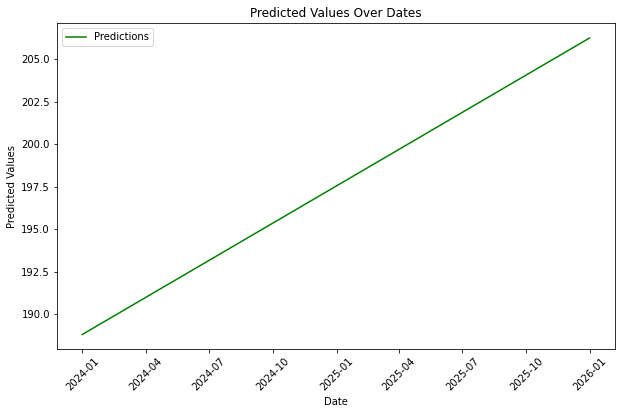

In [0]:
df_msft_lr = df_msft.withColumn("date", col('date').cast('timestamp').cast('long'))

vectorAssembler = VectorAssembler(inputCols=["date"], outputCol="features")
df_features = vectorAssembler.transform(df_msft_lr).select("features", "close")

# Split the data into training and test sets (e.g., 80% train, 20% test)
(train_data, test_data) = df_features.randomSplit([0.8, 0.2])

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="close")

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test set
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("features", "close", "prediction").show()

# Evaluate the model (if needed)
evaluator = RegressionEvaluator(labelCol="close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Create dates in future
start_date = datetime.strptime('2024-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365 * 2)  # Adding 2 years

# Generate future dates for the next 2 years
future_dates = []
while start_date <= end_date:
    future_dates.append(start_date.strftime('%Y-%m-%d'))
    start_date += timedelta(days=1)  # Increment by one day

# Create a DataFrame with future dates
schema_future = StructType([
    StructField("date", DateType(), True),
])
date_objects = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in future_dates]

# Create a list of Rows containing dates
rows = [Row(date=date_obj) for date_obj in date_objects]
df_future = spark.createDataFrame(rows)
df_future_lr = df_future.withColumn('date', col('date').cast('timestamp').cast('long')) 

# Assemble features for future dates
df_features_future = vectorAssembler.transform(df_future_lr).select("features")

# Make predictions for future dates using the trained model
predictions_future = lr_model.transform(df_features_future)

# Show predictions for future dates
predictions_future.show()

predictions_pd = predictions_future.select("prediction").toPandas()
dates_pd = df_future.select("date").toPandas()

# Convert features column to a list of ...
dates_list = dates_pd['date'].tolist()
predictions_list = predictions_pd['prediction'].tolist()

plt.figure(figsize=(10, 6))
plt.plot(dates_list, predictions_list, label='Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Over Dates')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Polynomial Regression

Here we are using Polynomial Regression for prediction hopping for better result. <br>
After changing degree of regression, we come to conclusion that degree = 5 gives us the best result. <br>
After training and testing we get that Root Mean Squared Error (RMSE) on test data is 16.1711 $. <br>
Which is big improvement over Linear Regression.

Root Mean Squared Error (RMSE) on test data = 16.6096


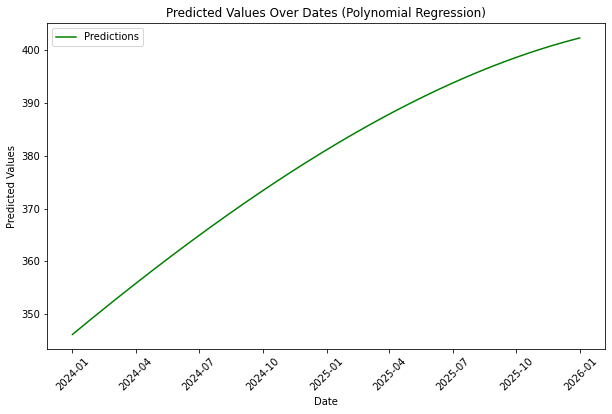

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion
from pyspark.ml import Pipeline

# Assuming df_features contains your features and close columns

# Assemble the feature vector
vector_assembler = VectorAssembler(inputCols=["date"], outputCol="features")
df_assembled = vector_assembler.transform(df_msft_lr)

# Define the Polynomial Expansion stage to create polynomial features
poly_expansion = PolynomialExpansion(degree=5, inputCol="features", outputCol="poly_features")

# Create a Linear Regression model
lr = LinearRegression(featuresCol="poly_features", labelCol="close")

# Create a Pipeline combining Polynomial Expansion and Linear Regression
pipeline = Pipeline(stages=[poly_expansion, lr])

# Split the data into training and test sets (e.g., 80% train, 20% test)
(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2])

# Train the model
lr_model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = lr_model.transform(test_data)

# Show predictions
#predictions.select("poly_features", "close", "date").show()

# Evaluate the model (if needed)
evaluator = RegressionEvaluator(labelCol="close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Use the trained model for predicting future dates with polynomial features
predictions_future = lr_model.transform(df_features_future)

# Show predictions for future dates
#predictions_future.show()

# Extract predicted values and dates for plotting
predictions_pd = predictions_future.select("prediction").toPandas()
dates_pd = df_future.select("date").toPandas()

# Convert features column to a list of dates
dates_list = dates_pd['date'].tolist()

# Convert the predictions column to a list of predicted values
predictions_list = predictions_pd['prediction'].tolist()

# Plotting using Matplotlib

plt.figure(figsize=(10, 6))
plt.plot(dates_list, predictions_list, label='Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Over Dates (Polynomial Regression)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## 4 Price volatility per month of Microsoft's stock price


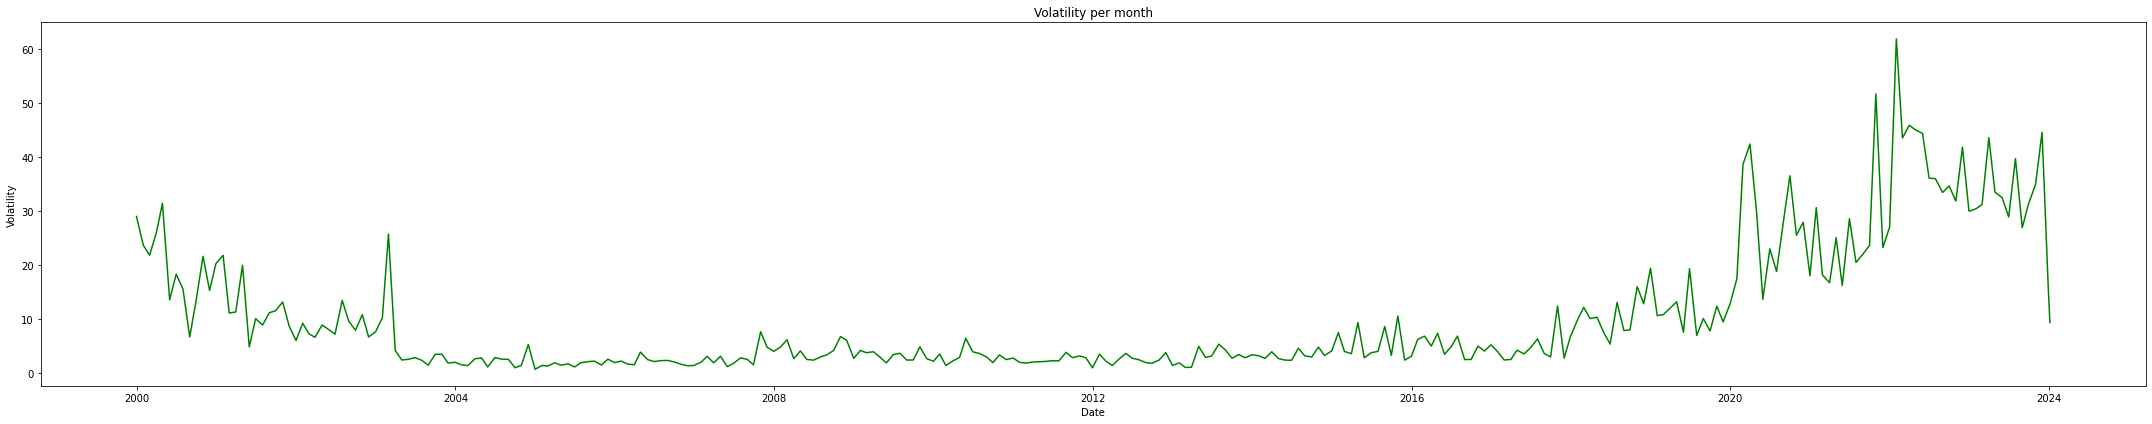

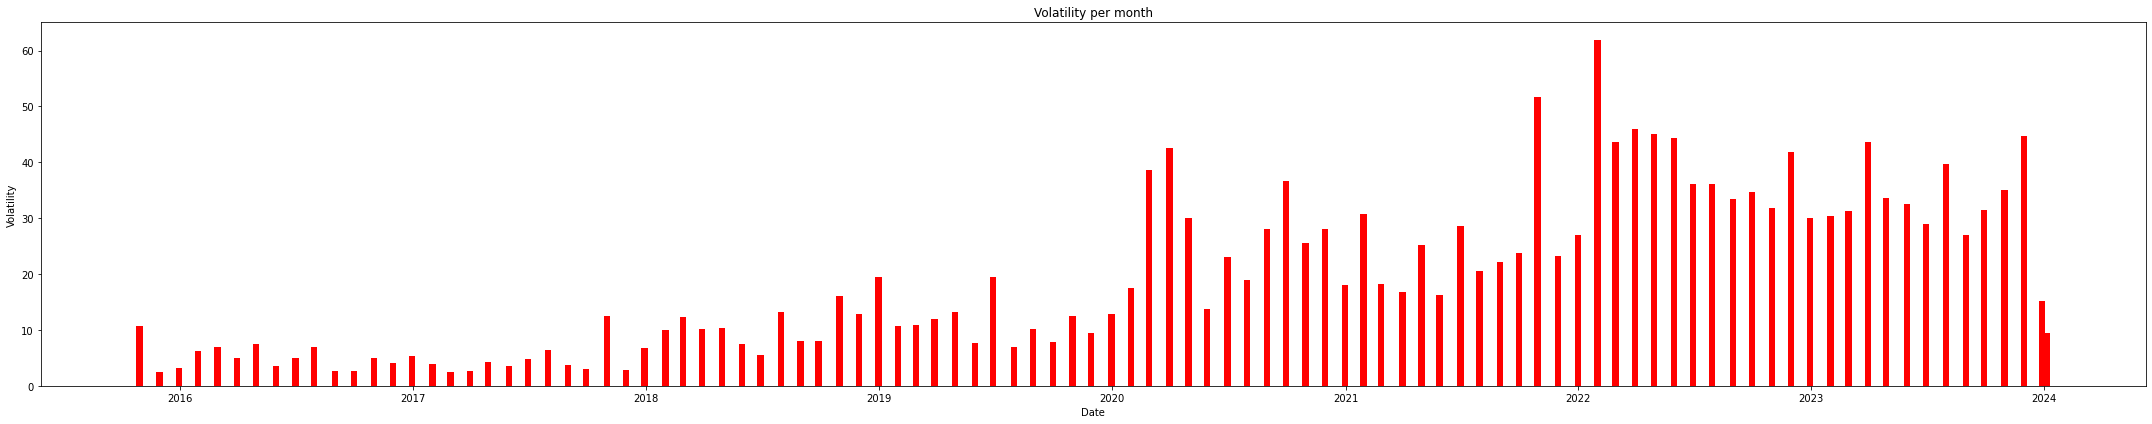

In [0]:
df_msft_monthly_filtered = df_msft_monthly.withColumn('volatility', col('high') - col('low')).select(col('date'), col('volatility'))


df_msft_monthly_filtered_plot = df_msft_monthly_filtered.toPandas()
plt.figure(figsize=(30, 6))
plt.plot(df_msft_monthly_filtered_plot['date'], df_msft_monthly_filtered_plot['volatility'], label='Volatility', color='green')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility per month')
plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 6))
plt.bar(df_msft_monthly_filtered_plot['date'].head(100), df_msft_monthly_filtered_plot['volatility'].head(100), label='Volatility', color='red', width=10)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility per month')
plt.tight_layout()
plt.show()

# Pearson's correlation test

The Product Moment Correlation Coefficiont (PMCC), or r, is a measure of how strongly related 2 variables are. <br>
Sample size 2,305, significant level 0.05 <br>
The hypothesis is one-tailed (right) since we are only testing for positive correlation. <br>
The corresponding critical correlation value r_c for a signifiance level of α=0.05, for a right-tailed test is: r_c = 0.024. <br>
Observe that in this case, the null hypothesis is rejected if |r| > r_c = 0.024.



## 5

Null Hypothesis: There is no correlation between the volatility of Microsoft stocks and it's volume. <br>
Alternate Hypothesis: There exists a correlation, either positive or negative, between the volatility of Microsoft stocks and it's volume. <br>
Output: Confusion matrix with calculated PMCCs (r). <br>
The absolute value is 0.0.378 which is larger than 0.024. Since the PMCCs are larger than the critical value at the 5% level of significance, we can reach a conclustion. <br>
Conclusion: SInce the PMCCs are larger than the critical value, we choose to reject the null hypothesis. We can conclude that there is a significant evidence to support the claim that mbetween the volatility of Microsoft stocks and it's volume.

date volatility volume 2024-01-05 9.399994 89318051 2023-12-29 15.26001 521914675 2023-11-30 44.649994 564165364 2023-10-31 34.985016 540963749 2023-09-29 31.409973 416768824 2023-08-31 26.989197 479669427 2023-07-31 39.78 666956355 2023-06-30 28.970001 547748450 2023-05-31 32.54001 600453246 2023-04-28 33.559998 551356990 2023-03-31 43.65999 747751976 2023-02-28 31.290009 615540778 2023-01-31 30.479996 666168068 2022-12-30 30.045013 591366468 2022-11-30 41.899002 615328220 2022-10-31 31.909988 671366804 2022-09-30 34.720016 575416752 2022-08-31 33.51999 476959033 2022-07-29 36.059998 534986150 2022-06-30 36.180008 621501474 2022-05-31 44.440002 742766114 2022-04-29 45.109985 622644983 2022-03-31 45.950012 732627846 2022-02-28 43.600006 697204843 2022-01-31 61.950012 946705316 2021-12-31 27.049988 625743806 2021-11-30 23.300018 507120518 2021-10-29 51.75 516523658 2021-09-30 23.700012 502931199 2021-08-31 22.100006 440360333 2021-07-30 20.549988 522303043 2021-06-30 28.649994 508388858 2021-05-28 16.279999 495089530 2021-04-30 25.139908 568698272 2021-03-31 16.790009 724981506 2021-02-26 18.25 489396912 2021-01-29 30.699997 647897096 2020-12-31 18.069992 593966967 2020-11-30 28.0 573325190 2020-10-30 25.590012 631674298 2020-09-30 36.61 768528897 2020-08-31 28.009995 692382980 2020-07-31 18.87001 769842002 2020-06-30 23.049988 765012029 2020-05-29 13.709991 688873081 2020-04-30 30.039993 984810925 2020-03-31 42.479996 1612954386 2020-02-28 38.699997 887894931 2020-01-31 17.540009 555989763 2019-12-31 12.900009 452664147 2019-11-29 9.529999 393028043 2019-10-31 12.449997 560654410 2019-09-30 7.8600006 477645820 2019-08-30 10.160004 585509525 2019-07-31 7.0099945 484553299 2019-06-28 19.389992 508324437 2019-05-31 7.609993 547218448 2019-04-30 13.269997 433157868 2019-03-29 12.019997 589045341 2019-02-28 10.889999 469095970 2019-01-31 10.700005 714204787 2018-12-31 19.46 944287635 2018-11-30 12.889999 720228643 2018-10-31 16.07 927547942 2018-09-28 8.059998 480255674 2018-08-31 7.9400024 456630721 2018-07-31 13.150002 569501573 2018-06-29 5.4300003 602585341 2018-05-31 7.540001 509418119 2018-04-30 10.389999 668258570 2018-03-29 10.159996 732866406 2018-02-28 12.239998 690287596 2018-01-31 9.949997 543377322 2017-12-29 6.799904 447828256 2017-11-30 2.8199997 415711970 2017-10-31 12.489998 440510118 2017-09-29 3.050003 367134396 2017-08-31 3.6800003 429156682 2017-07-31 6.4000015 451248934 2017-06-30 4.800003 610120893 2017-05-31 3.5999985 505249296 2017-04-28 4.290001 428857613 2017-03-31 2.5700035 489173200 2017-02-28 2.4899979 440744043 2017-01-31 3.960003 494435826 2016-12-30 5.299999 513579428 2016-11-30 4.130001 613056964 2016-10-31 5.054901 614841775 2016-09-30 2.579998 526855083 2016-08-31 2.5600014 467079004 2016-07-29 6.9000015 647587634 2016-06-30 4.915001 823987498 2016-05-31 3.540001 530869347 2016-04-29 7.420002 699025640 2016-03-31 5.0599976 640372350 2016-02-29 6.9000015 814770780 2016-01-29 6.290001 927914485 2015-12-31 3.1699982 793070000 2015-11-30 2.4500008 662622220 2015-10-30 10.619999 857330655 2015-09-30 3.3400002 670779566 2015-08-31 8.689999 776277394 2015-07-31 4.080002 725458102 2015-06-30 3.8300018 664853340 2015-05-29 2.8849983 633072750 2015-04-30 9.420002 874535095 2015-03-31 3.6499977 824335340 2015-02-27 4.0699997 656509827 2015-01-30 7.5600014 918738022 2014-12-31 4.16 626810606 2014-11-28 3.3149986 523008240 2014-10-31 4.8700027 853297059 2014-09-30 3.040001 860084532 2014-08-29 3.2600021 513429400 2014-07-31 4.66 731616500 2014-06-30 2.4300003 555779700 2014-05-30 2.460003 574362900 2014-04-30 2.7599983 746113500 2014-03-31 4.005001 778425700 2014-02-28 2.7700005 705304500 2014-01-31 3.2599983 930226200 2013-12-31 3.4500008 826617700 2013-11-29 2.9000015 800431600 2013-10-31 3.4900017 965331500 2013-09-30 2.7999992 1242961500 2013-08-30 4.3600006 1051265000 2013-07-31 5.4099007 1111130600 2013-06-28 3.209999 945155500 2013-05-31 2.959999 1071860000 2013-04-30 5.0 1322883228 2013-03-28 1.139999

+--------------------+--------------------+
|          volatility|              volume|
+--------------------+--------------------+
|                 1.0|-0.37866790468114325|
|-0.37866790468114325|                 1.0|
+--------------------+--------------------+



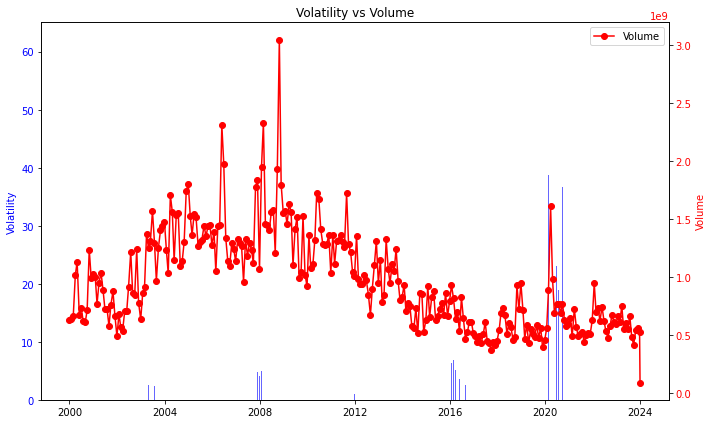

In [0]:
df_msft_monthly_corr = df_msft_monthly.withColumn('volatility', col('high') - col('low')).select(col('date'), col('volatility'), col('volume'))
display(df_msft_monthly_corr)

corr_analysis_df = df_msft_monthly_corr.select("volatility", "volume")
vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

columns = ['volatility', 'volume']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first series with its own y-axis
ax1.bar(df_msft_monthly_corrPD['date'], df_msft_monthly_corrPD['volatility'], color='blue', alpha=0.6, label='Volatility')
ax1.set_ylabel('Volatility', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second series
ax2 = ax1.twinx()
ax2.plot(df_msft_monthly_corrPD['date'], df_msft_monthly_corrPD['volume'], color='red', marker='o', label='Volume')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set titles, labels, and legends
plt.title('Volatility vs Volume')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()